In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

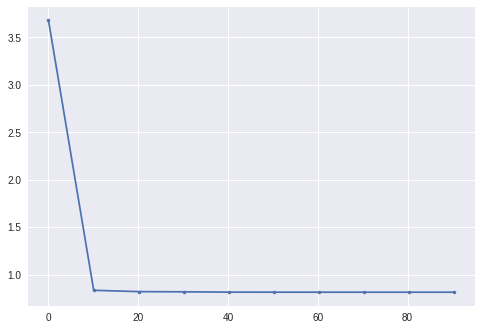

In [8]:
k = 8
sv_threshold = '10'
num_gram = 1
num = 0
dataset = 'ml-20m'

use_gpu = 'true'
accelerated = 'true'
soft_threshold = 'true'
filename = './%s/impute_%d_%d_%s_%s_%d_%s_%s.tsv' % (dataset, num, k, sv_threshold, soft_threshold, num_gram, use_gpu, accelerated)
df = pd.read_csv(filename, sep='\t')
plt.plot(df['time'], df['rmse'], label='GPU-Accelerated', marker='.')
plt.show()